November: Implements improvements to the basic bathymetry originally developed in make_mackenzie.ipynb.

In [29]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_idealized
import functions_plot

# Load

Since this notebook's purpose is just to compare bathymetries, I've shortened the procedure so all you need to enter is the values for x/ysize and x/y_wall and the canyon dimensions in make_topo_smooth. You can get the former values from print statements in final_bathymetry.

Load the realistic bathymetry against which you're comparing the idealized bathymetry, preferably one with the same size so the resolution features match up.

In [2]:
xsize, ysize, x_wall, y_wall = 238, 178, 547219.33445374772, 406382.26879306574

real_file = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/NEMO_files/realistic/real_bathy_02.nc')
z_real = real_file['Bathymetry'][:]

# Original - preFebruary

This will have changed - not only values but also organization.

# Idealized bathymetry functions

Functions are modified from the original make_mackenzie notebook. I work on the function's new versions here and then copy them to functions_idealized.py. This includes the way that y's are calculated using the total size of the domain. The values for y are calculated by finding the distance between the southern wall of the domain and the feature and then subtracting it from the total y_wall distance.

What I've observed is that changing the mid width does nothing if you don't give it room to expand by changing the w_head and w_break. Also removing the squared from the first elif gives a U shaped canyon instead of a gradual gaussian. Changing the mid width doesn't do much if you don't change the head width. Changing the head width and leaving the break width constant is the best way to go because the mid width adjusts and the break remains in the same place (doesn't expand).

# Resulting idealized bathymetry

This set up is modified from what was originally in final_bathymetry. Now, it should be a lot simpler as it takes in consideration the final domain dimensions from the coordinates grid. **Remember** that we use y_edge not y in make_topo_smooth!

# Rechecking depth profile in June

In [3]:
x_wall, y_wall, w_break, w_mid, w_head, cR, L, p,\
y_coast, y_head, y_break, y_pointA, y_pointB, y_paral, y_base,\
fluid_depth, z_bottom, z_paral, z_pointA, z_pointB, z_break, z_coast = functions_idealized.Mackenzie_measurements(x_wall, y_wall)

x, y, y_edge, X, Y = functions_idealized.set_domain_grid(xsize, ysize, x_wall, y_wall)

z_ideal = functions_idealized.make_topo_smooth(y_edge, y_base, y_paral, y_pointA, y_pointB, y_break, y_head, y_coast,
                           cR, L, p, x, x_wall, w_break, w_mid, w_head,
                           fluid_depth, z_bottom, z_paral, z_pointA, z_pointB, z_break, z_coast)

(1400, -100)

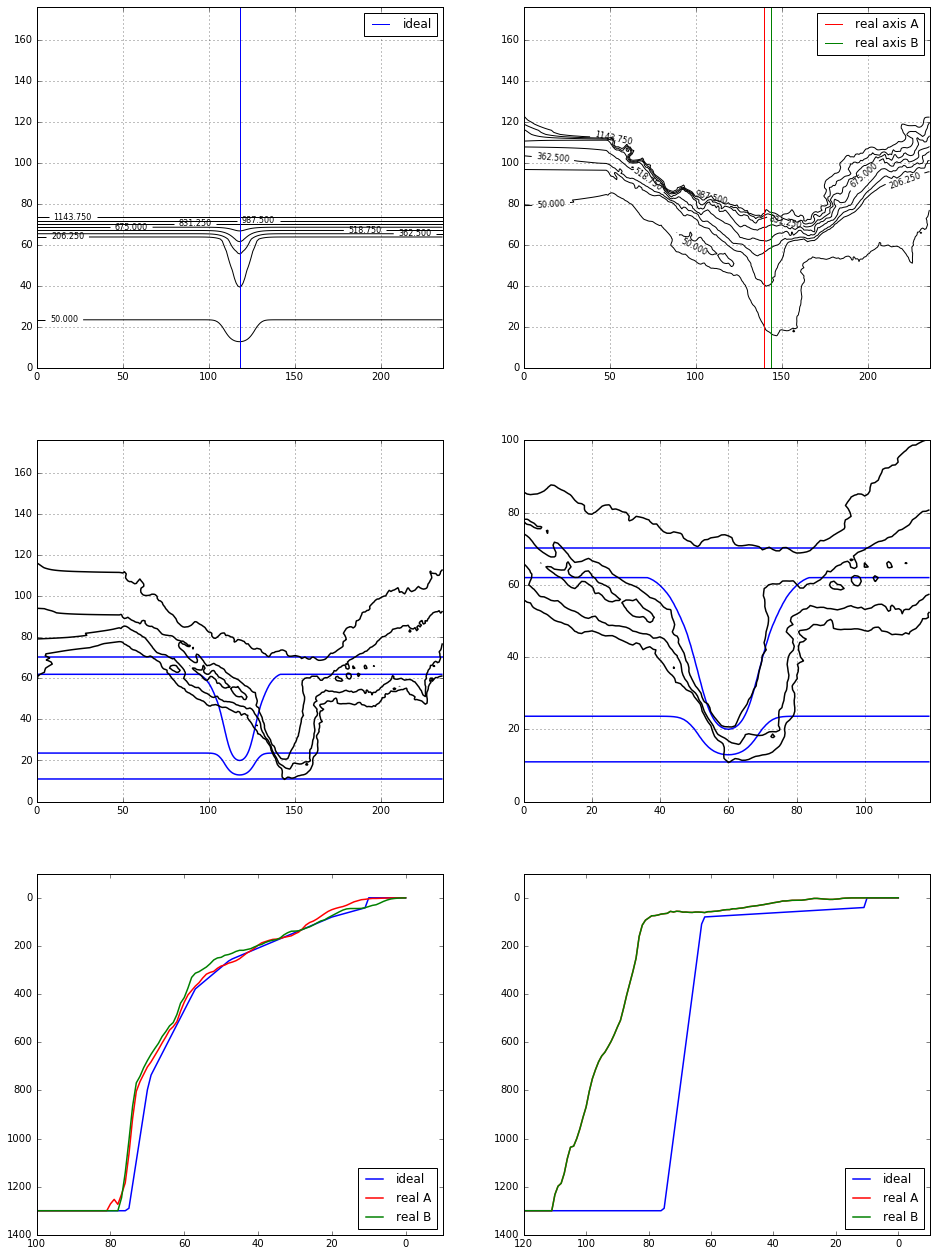

In [8]:
fig, ([ax1, ax2],[ax3, ax4], [ax5, ax6]) = plt.subplots(3, 2, figsize=(16,22))

#levels = np.linspace(40, fluid_depth, 10)
levels = np.linspace(50, fluid_depth, 9)

c1 = ax1.contour(z_ideal, levels = levels, colors='k'); ax1.clabel(c1, inline=1, fontsize=8)
mid_ideal = int(z_ideal.shape[1]/2)
ax1.axvline(mid_ideal, label='ideal')
ax1.grid(); ax1.legend()

c1 = ax2.contour(z_real, levels = levels, colors='k'); ax2.clabel(c1, inline=1, fontsize=8)
mid_reala = 140; ax2.axvline(mid_reala, c='r', label='real axis A')
mid_realb = 144; ax2.axvline(mid_realb, c='g', label = 'real axis B')
ax2.grid(); ax2.legend()
    
cs = ['b', 'r', 'g']#, 'gray']
zs = [z_ideal, z_real, z_real]#, z_ideal_orig]
labs = ['ideal', 'real A', 'real B']
mids = [mid_ideal, mid_reala, mid_realb]#, mid_ideal]
sides = [200]*4
for z, i, j, c, lab in zip(zs, mids, sides, cs, labs):
    ax5.plot(np.arange(z.shape[0]), z[:, i], c=c, lw=1.5, label=lab)
    ax6.plot(np.arange(z.shape[0]), z[:, j], c=c, lw=1.5, label = lab)

levels = [40, 50, 80, fluid_depth - z_paral]
cs = ['b', 'k']#, 'gray']
zs = [z_ideal, z_real]#, z_ideal_orig]
mids = [mid_ideal, mid_realb, mid_ideal]#, mid_ideal]
for z, i, c in zip(zs, mids, cs):
    ax3.contour(z, levels, colors=c, linewidths=1.5)
    ax4.contour(z[:, i-60:i+60], levels, colors=c, linewidths=1.5)

ax3.grid()
ax4.set_ylim([0,100]); ax4.grid()
ax5.legend(loc=4); ax6.legend(loc=4)
ax5.invert_yaxis(); ax5.set_xlim([100,-10]); ax5.set_ylim([1400,-100])
ax6.invert_yaxis(); ax6.set_xlim([120,-10]); ax6.set_ylim([1400,-100])

(1400, -100)

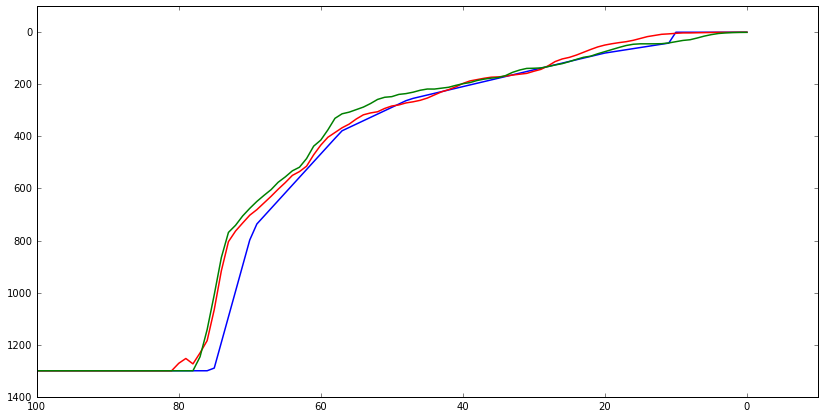

In [25]:
fig, ax = plt.subplots(1,1,figsize=(14,7))

cs = ['b', 'r', 'g']
zs = [z_ideal, z_real, z_real]
labs = ['ideal', 'real A', 'real B']
mids = [mid_ideal, mid_reala, mid_realb]

for z, i, c, lab, n in zip(zs, mids, cs, labs, np.arange(3)):
    ax.plot(np.arange(z.shape[0]), z[:, i], c=c, lw=1.5, label=lab)
ax.set_xlim([100,-10]); ax.set_ylim([1400,-100])